In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ECOv003_L3T_L4T_JET import load_ECOv002_calval_JET_outputs, INPUT_VARIABLES

In [2]:
df = load_ECOv002_calval_JET_outputs()
df

,Unnamed: 0,ID,vegetation,climate,STICinst,BESSinst,MOD16inst,PTJPLSMinst,ETinst,ETinstUncertainty,...,ET_daylight_PMJPL_kg,G_PMJPL_Wm2,G_Wm2,LE_instantaneous_Wm2,ET_daylight_kg,ET_uncertainty,GPP_inst_g_m2_s,ET_canopy_inst_kg_m2_s,WUE,AuxiliaryNWP
0,0,US-NC3,ENF,Cfa,270.345200,78.53355,392.851840,307.021970,487.383423,118.916280,...,3.933367,60.425858,60.425858,351.448461,4.144935,0.773774,0.000212,0.000109,1.943556,NaN
1,1,US-Mi3,CVM,Dfb,232.141600,229.20093,640.118470,375.089300,106.825577,167.919460,...,3.776753,99.328964,99.328964,326.039533,4.279363,1.239315,0.000269,0.000111,2.421845,NaN
2,2,US-Mi3,CVM,Dfb,356.355740,335.23154,625.661700,284.686250,NaN,132.936340,...,3.507920,94.519459,94.519459,335.227024,4.353823,0.920482,0.000251,0.000044,5.670131,NaN
3,3,US-Mi3,CVM,Dfb,332.938400,326.68680,624.254330,251.414490,178.827545,141.132420,...,3.951060,78.277108,78.277108,332.815927,4.433066,0.372526,0.000303,0.000049,6.158837,NaN
4,4,US-Mi3,CVM,Dfb,286.854030,237.21654,511.082180,228.520170,154.791626,114.809410,...,4.161007,70.628272,70.628272,290.934683,4.244395,0.368856,0.000283,0.000058,4.846558,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1060,US-xAE,GRA,Cfa,70.923310,172.37459,81.645230,15.282976,NaN,56.385185,...,0.077304,5.985288,5.985288,35.172955,0.423263,0.427738,0.000006,0.000008,0.723558,NaN
1061,1061,US-xAE,GRA,Cfa,116.543190,121.81641,65.469320,22.186659,NaN,40.509410,...,0.009255,23.006297,23.006297,37.569789,0.815034,1.326901,0.000015,0.000012,1.260016,NaN
1062,1062,US-xAE,GRA,Cfa,129.880100,0.00000,118.777240,55.343586,NaN,52.403820,...,0.000800,43.185134,43.185134,27.267393,0.585193,0.710205,0.000041,0.000031,1.332510,NaN
1063,1063,US-xAE,GRA,Cfa,2.707851,140.38632,126.490524,40.434025,NaN,57.769722,...,0.034298,28.164673,28.164673,58.151051,1.076441,0.606770,0.000024,0.000023,1.048858,NaN


In [3]:
[column for column in df.columns if "insitu" in column]

['insitu_LE_Wm2',
 'insitu_H_Wm2',
 'insitu_Rn_Wm2',
 'insitu_G_Wm2',
 'insitu_SWin_Wm2',
 'insitu_Ta_C',
 'insitu_RH',
 'insitu_Rn_daylight_Wm2',
 'insitu_LE_daylight_Wm2',
 'insitu_ET_daylight_kg']

In [4]:
df["Ta_C_error"] = df["Ta_C"] - df["insitu_Ta_C"]
df[["Ta_C", "insitu_Ta_C", "Ta_C_error"]].head()

,Ta_C,insitu_Ta_C,Ta_C_error
0,32.658920,31.80107,0.857850
1,24.227982,26.23260,-2.004618
2,26.178862,30.26300,-4.084138
3,22.527096,23.63330,-1.106204
4,23.280691,24.33430,-1.053609


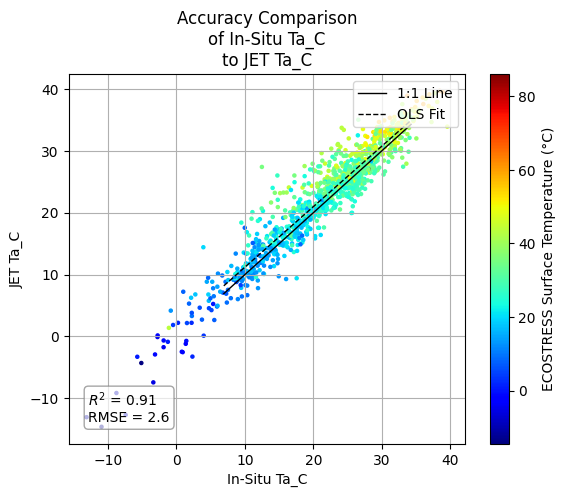

In [5]:
model_name = "JET"
x_variable = "insitu_Ta_C"
y_variable = "Ta_C"

# Filter out rows with NaN values in either variable
valid_data = df[[x_variable, y_variable, 'ST_C']].dropna()

sc = plt.scatter(
    x=valid_data[x_variable],
    y=valid_data[y_variable],
    c=valid_data.ST_C,
    cmap="jet",
    color=None,
    s=5
)

# Calculate 5% and 95% tails for x and y variables
x_5th, x_95th = np.percentile(valid_data[x_variable], [5, 95])
y_5th, y_95th = np.percentile(valid_data[y_variable], [5, 95])

min_val = min(x_5th, y_5th)
max_val = max(x_95th, y_95th)

# Add 1-to-1 line
# min_val = min(valid_data[x_variable].min(), valid_data[y_variable].min())
# max_val = max(valid_data[x_variable].max(), valid_data[y_variable].max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', linewidth=1, label='1:1 Line')

# Add OLS regression line
coefs = np.polyfit(valid_data[x_variable], valid_data[y_variable], 1)
ols_x = np.array([min_val, max_val])
ols_y = coefs[0] * ols_x + coefs[1]
plt.plot(ols_x, ols_y, color='black', linestyle='--', linewidth=1, label='OLS Fit')

# Calculate R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error
y_true = valid_data[y_variable]
y_pred = coefs[0] * valid_data[x_variable] + coefs[1]
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Annotate R-squared and RMSE on plot in lower left corner
plt.annotate(f"$R^2$ = {r2:.2f}\nRMSE = {rmse:.1f}",
            xy=(0.05, 0.05), xycoords='axes fraction',
            ha='left', va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.7))

plt.grid(True, zorder=0) 
plt.xlabel(f"In-Situ {y_variable}")
plt.ylabel(f"{model_name} {y_variable}")
plt.title(f"Accuracy Comparison\nof In-Situ {y_variable}\nto {model_name} {y_variable}")
plt.colorbar(sc, label="ECOSTRESS Surface Temperature (°C)")
plt.legend(loc='upper right')

plt.show()

In [6]:
for variable in INPUT_VARIABLES:
    print(variable, variable in df.columns)

AOT True
C4_fraction True
Ca True
CI True
COT True
IGBP True
KG_climate True
NDVI True
NDVI_maximum True
NDVI_minimum True
NIR_albedo True
PAR_albedo True
RH True
ST_C True
SZA_deg True
Ta_C True
Tmin_C True
Topt_C True
albedo True
ball_berry_intercept_C3 True
ball_berry_intercept_C4 False
ball_berry_slope_C3 True
ball_berry_slope_C4 True
canopy_height_meters True
canopy_temperature_C False
carbon_uptake_efficiency True
elevation_m True
emissivity True
fAPARmax True
field_capacity True
geometry True
kn True
ozone_cm True
peakVCmax_C3_μmolm2s1 False
peakVCmax_C4_μmolm2s1 False
soil_moisture False
soil_temperature_C False
time_UTC True
vapor_gccm True
wind_speed_mps True


In [7]:
# Correlations for INPUT_VARIABLES with Ta_C_error
vars_in_df = [v for v in INPUT_VARIABLES if v in df.columns]
numeric_vars = df[vars_in_df].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations and keep only finite values (no NaN, no inf)
corrs = df[numeric_vars].corrwith(df["Ta_C_error"])
input_var_corrs = (
    corrs[np.isfinite(corrs)]
    .sort_values(ascending=False)
    .rename("correlation")
    .to_frame()
)

input_var_corrs

,correlation
elevation_m,0.460818
kn,0.424642
carbon_uptake_efficiency,0.424642
ball_berry_intercept_C3,0.397332
ball_berry_slope_C4,0.386962
ST_C,0.256719
Ta_C,0.238243
IGBP,0.146300
wind_speed_mps,0.082730
PAR_albedo,0.046234


Stored top 10 positive correlations in 'top_positive_correlations'
Stored top 10 negative correlations in 'top_negative_correlations'

TOP 20 STRONGEST CORRELATIONS WITH Ta_C_error
(INPUT_VARIABLES Only, Real Values Only)

Top 10 Positive Correlations:
elevation_m                 0.460818
kn                          0.424642
carbon_uptake_efficiency    0.424642
ball_berry_intercept_C3     0.397332
ball_berry_slope_C4         0.386962
ST_C                        0.256719
Ta_C                        0.238243
IGBP                        0.146300
wind_speed_mps              0.082730
PAR_albedo                  0.046234
Name: correlation, dtype: float64

------------------------------------------------------------

Top 10 Negative Correlations:
KG_climate             -0.076874
vapor_gccm             -0.087943
Tmin_C                 -0.093888
NDVI                   -0.189977
canopy_height_meters   -0.219627
SZA_deg                -0.264361
NDVI_minimum           -0.296765
fAPARmax           

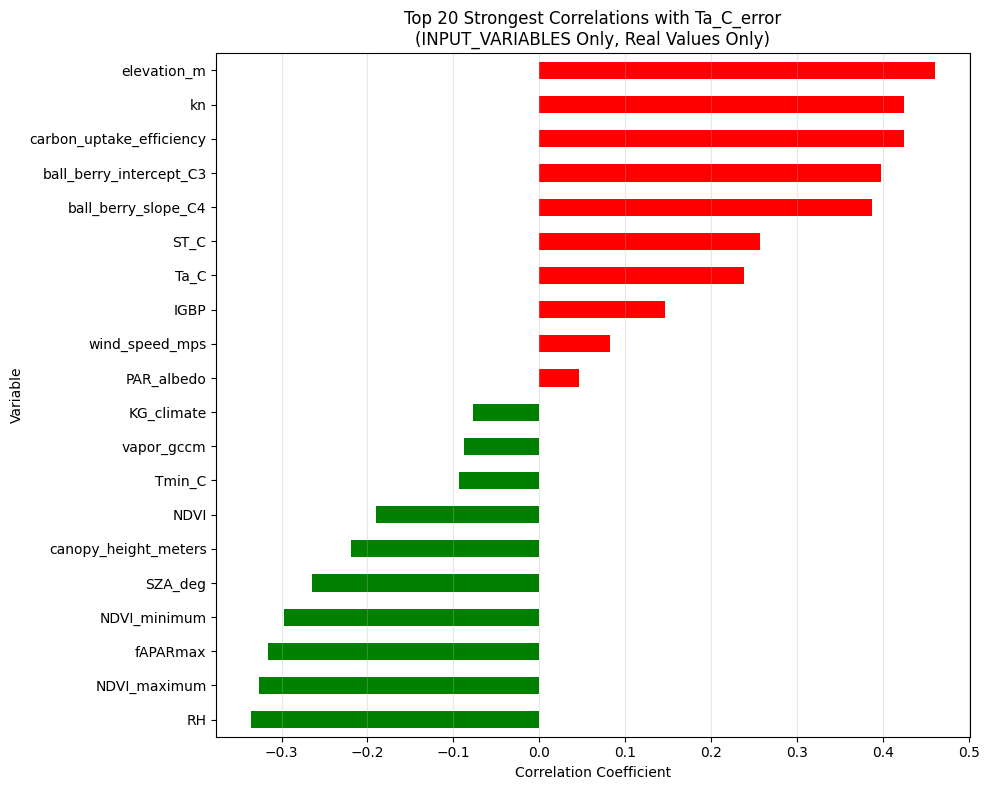

In [8]:
# Discover top strongest correlations with Ta_C_error
import seaborn as sns
import pandas as pd

top_n = 20  # Number of top correlations to display

# Use input_var_corrs which already has only variables with real correlation values
correlations = input_var_corrs['correlation']

# Store top correlations and anti-correlations for future use
top_positive_correlations = correlations.head(top_n//2)
top_negative_correlations = correlations.tail(top_n//2)

print(f"Stored top {top_n//2} positive correlations in 'top_positive_correlations'")
print(f"Stored top {top_n//2} negative correlations in 'top_negative_correlations'")
print()

# Display top correlations
print("=" * 60)
print(f"TOP {top_n} STRONGEST CORRELATIONS WITH Ta_C_error")
print("(INPUT_VARIABLES Only, Real Values Only)")
print("=" * 60)
print(f"\nTop {top_n//2} Positive Correlations:")
print(top_positive_correlations)
print("\n" + "-" * 60)
print(f"\nTop {top_n//2} Negative Correlations:")
print(top_negative_correlations)

# Visualize top n correlations (positive and negative combined)
fig, ax = plt.subplots(figsize=(10, 8))
top_correlations = pd.concat([top_positive_correlations, top_negative_correlations])
colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
top_correlations.sort_values().plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Variable')
ax.set_title(f'Top {top_n} Strongest Correlations with Ta_C_error\n(INPUT_VARIABLES Only, Real Values Only)')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


OLS REGRESSION COEFFICIENTS FOR Ta_C_error
                Variable  Coefficient
                fAPARmax    11.584007
              PAR_albedo     4.937105
                      kn     3.482848
     ball_berry_slope_C4     1.033252
              KG_climate     0.832976
 ball_berry_intercept_C3     0.161952
                    NDVI     0.127436
carbon_uptake_efficiency     0.116095
                    Ta_C     0.109122
             elevation_m     0.001006
                  Tmin_C    -0.019828
    canopy_height_meters    -0.021152
                    IGBP    -0.028629
                 SZA_deg    -0.045386
                    ST_C    -0.058307
          wind_speed_mps    -0.076864
              vapor_gccm    -0.127063
            NDVI_minimum    -0.966838
                      RH    -1.978171
            NDVI_maximum    -7.626360

Intercept: -6.433594

Model Performance:
R² = 0.4043
RMSE = 2.0077


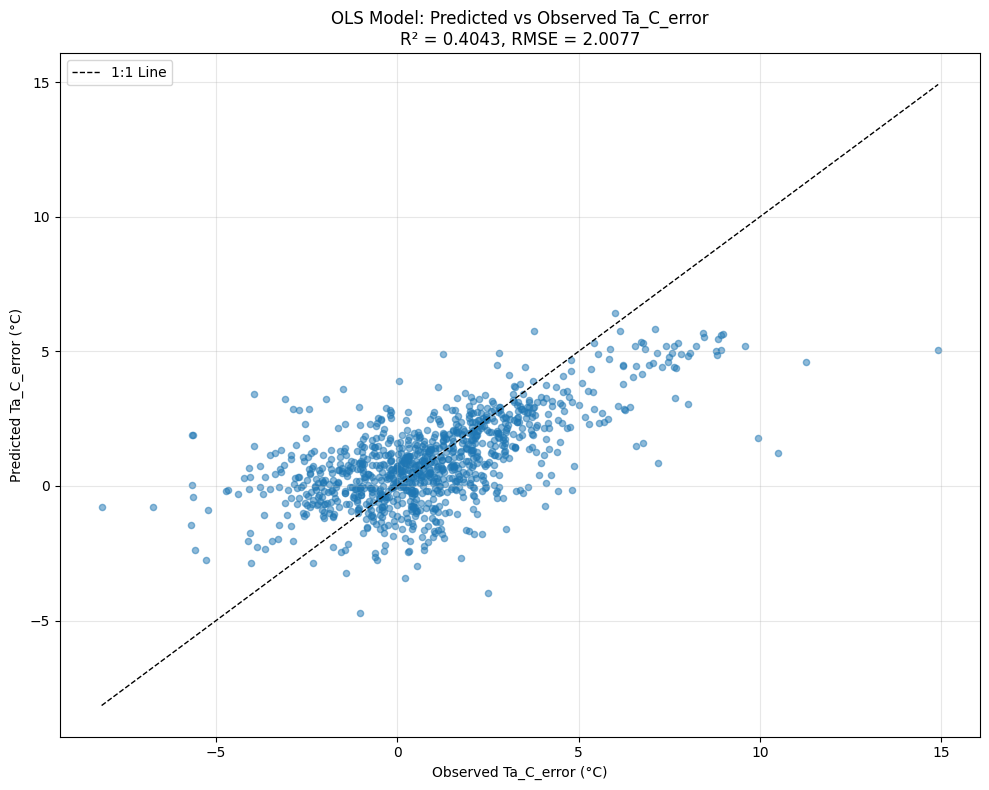

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Get the top correlating variables (both positive and negative)
top_corr_vars = top_correlations.index.tolist()

# Prepare data: remove rows with NaN in any of the top corr variables or Ta_C_error
X = df[top_corr_vars].dropna()
y = df.loc[X.index, "Ta_C_error"].dropna()

# Ensure X and y have the same index
common_idx = X.index.intersection(y.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Fit OLS regression
ols_model = LinearRegression()
ols_model.fit(X, y)

# Get coefficients
coef_df = pd.DataFrame({
    'Variable': top_corr_vars,
    'Coefficient': ols_model.coef_
}).sort_values('Coefficient', ascending=False)

print("=" * 60)
print("OLS REGRESSION COEFFICIENTS FOR Ta_C_error")
print("=" * 60)
print(coef_df.to_string(index=False))
print(f"\nIntercept: {ols_model.intercept_:.6f}")

# Generate predictions
y_pred_ols = ols_model.predict(X)

# Calculate metrics
r2_ols = r2_score(y, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y, y_pred_ols))

print(f"\nModel Performance:")
print(f"R² = {r2_ols:.4f}")
print(f"RMSE = {rmse_ols:.4f}")

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y, y_pred_ols, alpha=0.5, s=20)

# Add 1:1 line
min_lim = min(y.min(), y_pred_ols.min())
max_lim = max(y.max(), y_pred_ols.max())
plt.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, label='1:1 Line')

plt.xlabel('Observed Ta_C_error (°C)')
plt.ylabel('Predicted Ta_C_error (°C)')
plt.title(f'OLS Model: Predicted vs Observed Ta_C_error\nR² = {r2_ols:.4f}, RMSE = {rmse_ols:.4f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

OLS                  | R² = 0.4043 | RMSE = 2.0077
Random Forest        | R² = 0.8901 | RMSE = 0.8623
Gradient Boosting    | R² = 0.9460 | RMSE = 0.6045

MODEL PERFORMANCE SUMMARY
1. Gradient Boosting    | R² = 0.9460 | RMSE = 0.6045 | Improvement: +134.0%
2. Random Forest        | R² = 0.8901 | RMSE = 0.8623 | Improvement: +120.1%
3. OLS                  | R² = 0.4043 | RMSE = 2.0077 | Improvement: +0.0%


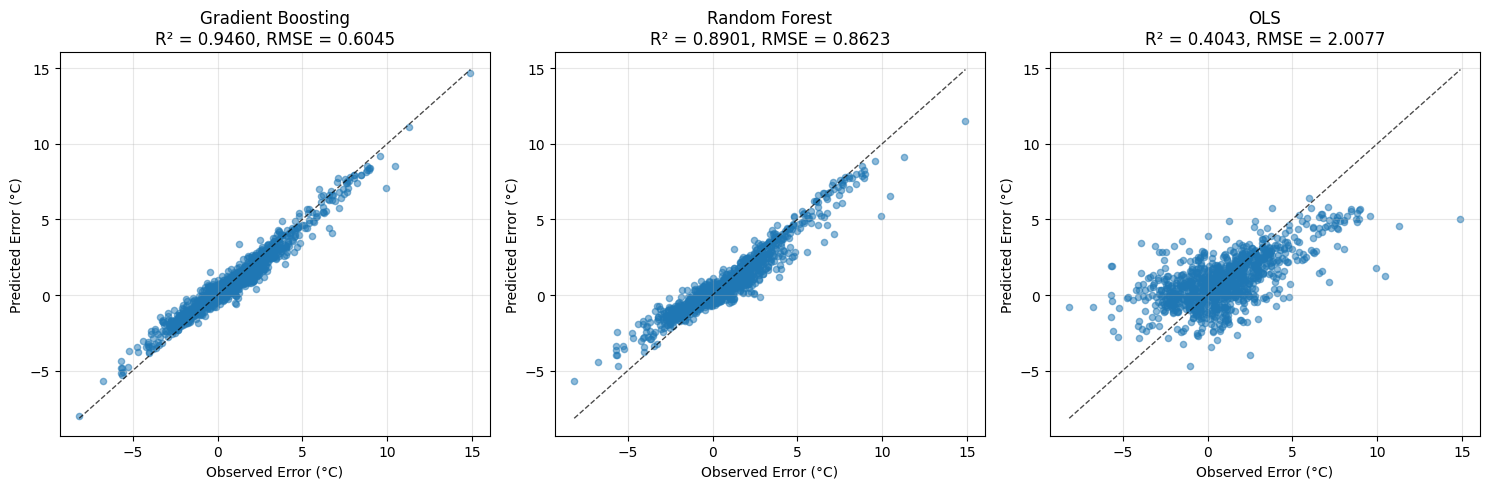


Best performing model: Gradient Boosting (R² = 0.9460)


In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Store all models and their results
models = {
    'OLS': ols_model,
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    if name == 'OLS':
        # Already trained
        y_pred = model.predict(X)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'r2': r2,
        'rmse': rmse
    }

    print(f"{name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f}")

print("\n" + "=" * 60)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)

# Sort by R² score
sorted_results = sorted(results.items(), key=lambda x: x[1]['r2'], reverse=True)
for i, (name, metrics) in enumerate(sorted_results, 1):
    r2 = metrics['r2']
    rmse = metrics['rmse']
    improvement = ((r2 - results['OLS']['r2']) / abs(results['OLS']['r2'])) * 100 if results['OLS']['r2'] != 0 else 0
    print(f"{i}. {name:20s} | R² = {r2:.4f} | RMSE = {rmse:.4f} | Improvement: {improvement:+.1f}%")

# Create comparison plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for idx, (name, metrics) in enumerate(sorted_results):
    y_pred = metrics['y_pred']
    r2 = metrics['r2']
    rmse = metrics['rmse']

    ax = axes[idx]
    ax.scatter(y, y_pred, alpha=0.5, s=20)

    # Add 1:1 reference line
    min_lim = min(y.min(), y_pred.min())
    max_lim = max(y.max(), y_pred.max())
    ax.plot([min_lim, max_lim], [min_lim, max_lim], 'k--', linewidth=1, alpha=0.7)

    ax.set_xlabel('Observed Error (°C)')
    ax.set_ylabel('Predicted Error (°C)')
    ax.set_title(f'{name}\nR² = {r2:.4f}, RMSE = {rmse:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBest performing model:", sorted_results[0][0],
      f"(R² = {sorted_results[0][1]['r2']:.4f})")